In [36]:
% matplotlib inline

import pandas as pd, numpy as np
import seaborn as sns
import utils.stats as stats
import utils.viz as viz
import statsmodels.formula.api as smf
import utils.viz as viz
from scipy.stats import shapiro
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_context('paper')

df_r = pd.read_pickle('/home/raid3/oligschlager/workspace/tractdist/data/df_regionwise.pkl')
df_p = pd.read_pickle('/home/raid3/oligschlager/workspace/tractdist/data/df_pairwise.pkl')

In [37]:
df_r = df_r.rename(columns={'average distance from nearest primary region': "dist_reg_prim",
                            'average distance from nearest limbic region': "dist_reg_limb"})

## outcome variable: DINJ ("raw")

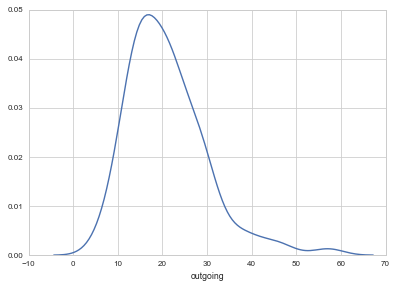

In [39]:
sns.distplot(df_r.outgoing, hist=False)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


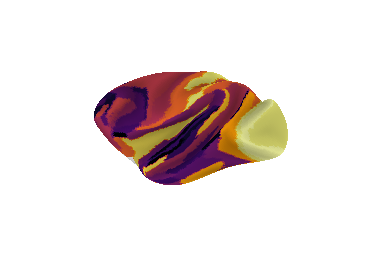

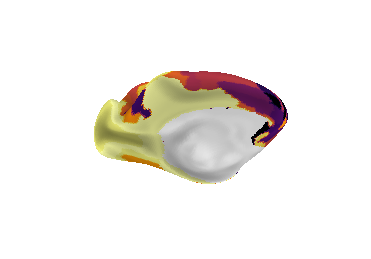

In [40]:
viz.plot_yerkes(df_r, 'outgoing', vmin=10, vmax=30)

## covariate: location (region's distance from all injections)

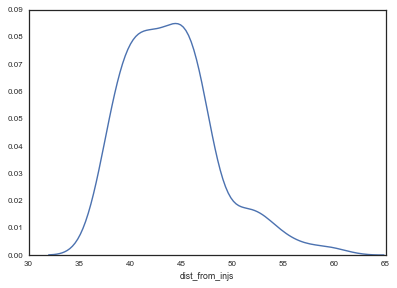

In [41]:
sns.distplot(df_r.dist_from_injs, hist=False)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


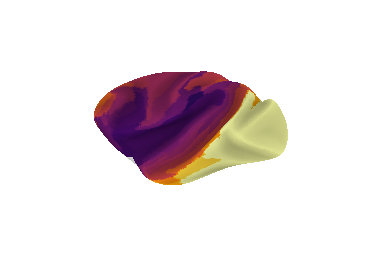

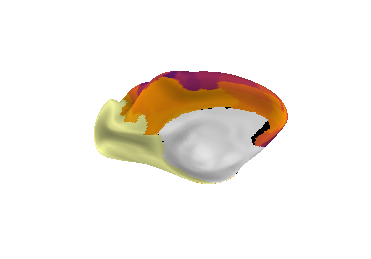

In [21]:
viz.plot_yerkes(df_r, 'dist_from_injs', vmin=35, vmax=50)

## covariate: region size

(-200, 3000)

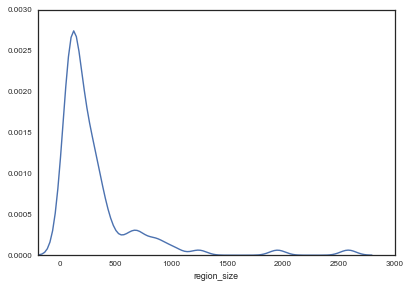

In [23]:
sns.distplot(df_r.region_size, hist=False)
plt.xlim(-200, 3000)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


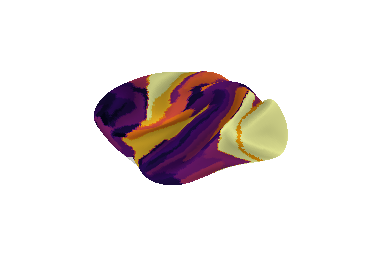

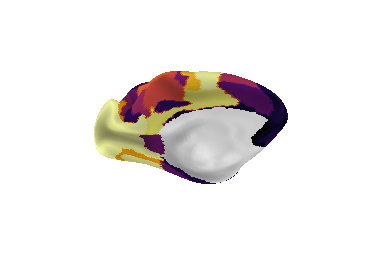

In [25]:
viz.plot_yerkes(df_r, 'region_size', vmin=0, vmax=1000)

## main analysis

In [42]:
def full_analysis(y):
    

    print '\nnull model'
    null = smf.ols(formula='%s ~ dist_from_injs \
                                 + region_size' % y, data=df_r).fit()
    print null.summary()

    print '\n\n\nfull model'
    full = smf.ols(formula='%s ~ dist_from_injs \
                                 + region_size \
                                 + dist_reg_limb \
                                 + dist_reg_prim' % y, data=df_r).fit()
    print full.summary()

    print '\n\n\n\nmodel assumptions'
    print '\n\nerror normally distributed?'
    print 'Shapiro test:', shapiro(full.resid)
    sns.distplot(full.resid)
    plt.show()

    print '\n\nheteroscedasticity?'
    sns.regplot(full.predict(), full.resid)
    plt.xlabel('observed Y')
    plt.ylabel('predicted Y')
    plt.show()
    
    print '\n\n\neffects'
    print '\n\nDINJ as a function of distance from limbic regions'
    sns.regplot(df_r['dist_reg_limb'], null.resid + df_r[y].mean())
    plt.ylabel('corrected DINJ')
    plt.show()
    
    print '\nDINJ against distance from primary regions'
    sns.regplot(df_r['dist_reg_prim'], null.resid + df_r[y].mean())
    plt.ylabel('corrected DINJ')
    plt.show()
    
    return null, full


null model
                            OLS Regression Results                            
Dep. Variable:               outgoing   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     8.698
Date:                Thu, 11 May 2017   Prob (F-statistic):           0.000357
Time:                        16:02:23   Log-Likelihood:                -318.81
No. Observations:                  91   AIC:                             643.6
Df Residuals:                      88   BIC:                             651.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept        -10.5530      9

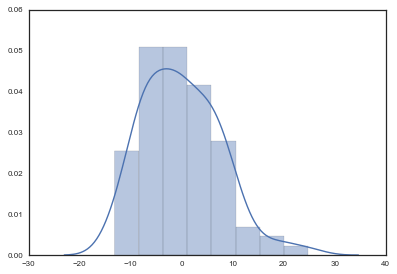



heteroscedasticity?


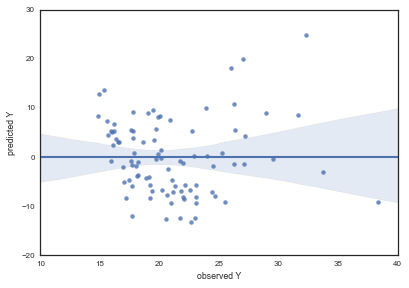




effects


DINJ as a function of distance from limbic regions


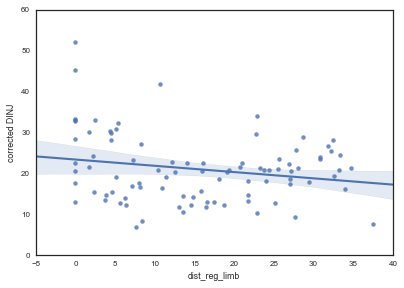


DINJ against distance from primary regions


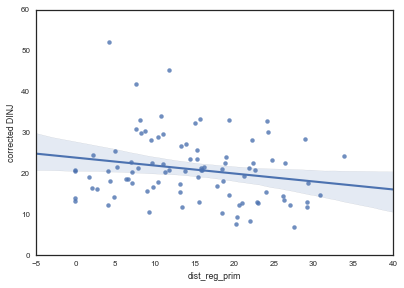

In [43]:
null, full = full_analysis('outgoing')

## outcome variable: DLN (corrected)

In [44]:
df_r['temp'] = np.nan
df_r.temp = null.resid + df_r.outgoing.mean()

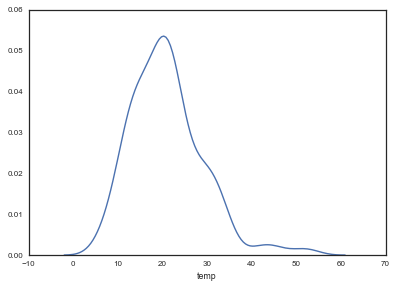

In [45]:
sns.distplot(df_r.temp, hist=False)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


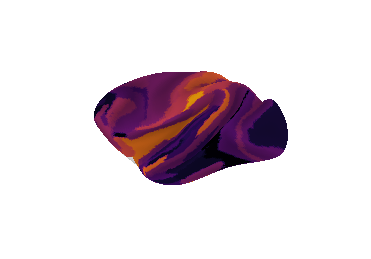

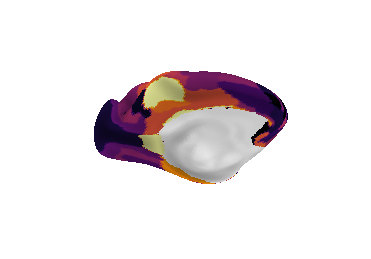

In [47]:
viz.plot_yerkes(df_r, 'temp', vmin=10, vmax=40)

In [49]:
def full_analysis(y):
    

    print '\nnull model'
    null = smf.ols(formula='%s ~ dist_from_injs \
                                 + region_size' % y, data=df_r[df_r.temp<40]).fit()
    print null.summary()

    print '\n\n\nfull model'
    full = smf.ols(formula='%s ~ dist_from_injs \
                                 + region_size \
                                 + dist_reg_limb \
                                 + dist_reg_prim' % y, data=df_r[df_r.temp<40]).fit()
    print full.summary()

    print '\n\n\n\nmodel assumptions'
    print '\n\nerror normally distributed?'
    print 'Shapiro test:', shapiro(full.resid)
    sns.distplot(full.resid)
    plt.show()

    print '\n\nheteroscedasticity?'
    sns.regplot(full.predict(), full.resid)
    plt.xlabel('observed Y')
    plt.ylabel('predicted Y')
    plt.show()
    
    print '\n\n\neffects'
    print '\n\nDINJ as a function of distance from limbic regions'
    sns.regplot(df_r['dist_reg_limb'][df_r.temp<40], null.resid + df_r[df_r.temp<40][y].mean())
    plt.ylabel('corrected DINJ')
    plt.show()
    
    print '\nDINJ against distance from primary regions'
    sns.regplot(df_r[df_r.temp<40]['dist_reg_prim'], null.resid + df_r[df_r.temp<40][y].mean())
    plt.ylabel('corrected DINJ')
    plt.show()
    
    return null, full


null model
                            OLS Regression Results                            
Dep. Variable:               outgoing   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     8.041
Date:                Thu, 11 May 2017   Prob (F-statistic):           0.000634
Time:                        16:18:39   Log-Likelihood:                -289.83
No. Observations:                  88   AIC:                             585.7
Df Residuals:                      85   BIC:                             593.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.0026      7

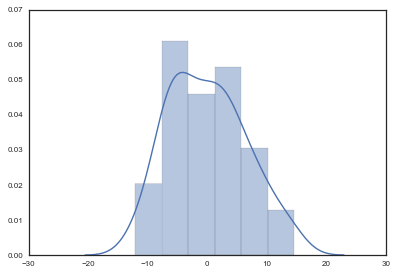



heteroscedasticity?


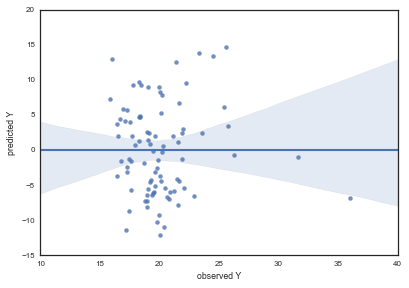




effects


DINJ as a function of distance from limbic regions


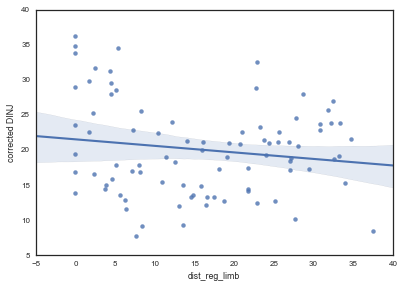


DINJ against distance from primary regions


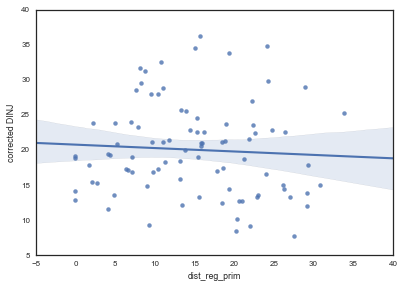

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7f72c2f60110>,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7f72d4a00950>)

In [50]:
full_analysis('outgoing')